# 고양이 수염 스티커

## 필요한 라이브러리 import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

## 이미지 로드

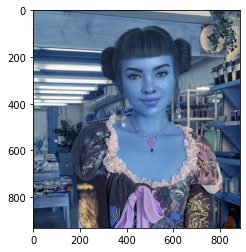

In [2]:
image_path = '../image/img3.png'

# 원본 이미지
origin_image = cv2.imread(image_path)

# 이미지를 변환하는동안 임시로 사용할 이미지
show_image = origin_image.copy()

plt.imshow(origin_image)

## 이미지 색상 BGR -> RGB 컨버팅

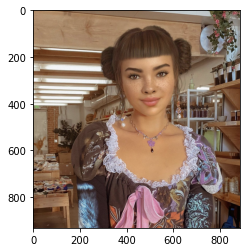

In [3]:
rgb_image = cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

## dlib를 사용하여 얼굴 위치 검출

rectangles[[(390, 217) (613, 440)]]


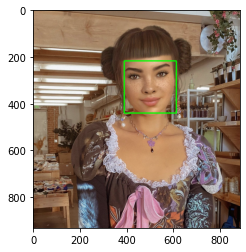

In [4]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(rgb_image, 1)
print(dlib_rects)

face_rect = dlib_rects[0]
cv2.rectangle(img= show_image,
              pt1= (face_rect.left(), face_rect.top()),
              pt2= (face_rect.right(), face_rect.bottom()),
              color=(0,255,0),
              thickness=3,
              lineType=cv2.LINE_AA)

plt.imshow(cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB))

## dlib를 사용하여 얼굴 랜드마크 검출


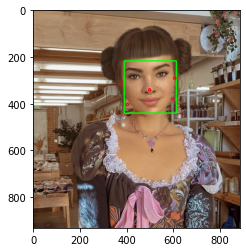

In [5]:
model_path =  "../models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

points = landmark_predictor(show_image, face_rect)
parts = points.parts()

nose_center_point = parts[30]
face_left_top = parts[1]
face_left_bottom = parts[4]
face_right_top = parts[15]
face_right_bottom = parts[12]

cv2.circle(img=show_image,
           center=(nose_center_point.x, nose_center_point.y),
           radius=5,
           thickness=3,
           color=(0,0,255))
cv2.circle(img=show_image,
           center=(face_left_top.x, face_left_top.y),
           radius=5,
           thickness=3,
           color=(0,0,255))
cv2.circle(img=show_image,
           center=(face_left_bottom.x, face_left_bottom.y),
           radius=5,
           thickness=3,
           color=(0,0,255))
cv2.circle(img=show_image,
           center=(face_right_top.x, face_right_top.y),
           radius=5,
           thickness=3,
           color=(0,0,255))
cv2.circle(img=show_image,
           center=(face_right_bottom.x, face_right_bottom.y),
           radius=5,
           thickness=3,
           color=(0,0,255))
plt.imshow(cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB))

In [6]:
import math

# 두 점 사이의 거리
def distance(pt1, pt2):
    a = pt2.x - pt1.x
    b = pt2.y - pt1.y
    return int(math.sqrt((a**2)+(b**2)))

# 중점
def center_point(pt1, pt2):
    x = int((pt1.x+pt2.x)/2)
    y = int((pt1.y+pt2.y)/2)
    return dlib.point(x, y)


## 스티커 이미지 로드/확인

In [7]:
sticker_path = '../image/whiskers.png'
origin_sticker_img = cv2.imread(sticker_path)
print(origin_sticker_img.shape)

(512, 512, 3)


## 스티커 이미지를 얼굴 크기에 맞게 resizing

232 232
(232, 232, 3)


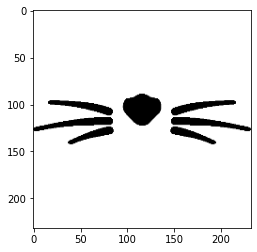

In [8]:
sticker_width = distance(face_left_top, face_right_top)
# 고양이수염 이미지 원본 비율(1:1)을 유지하기 위해 높이는 넓이값에 고정
sticker_height = sticker_width
# sticker_area_height = distance(center_point(face_left_top, face_right_top),
#                                center_point(face_left_bottom, face_right_bottom))
print(sticker_width, sticker_height)

resized_sticker = cv2.resize(origin_sticker_img, (sticker_width, sticker_height))
print (resized_sticker.shape)
plt.imshow(resized_sticker)

## 스티커 위치 설정

In [9]:
sticker_x = nose_center_point.x - sticker_width//2
sticker_y = nose_center_point.y - sticker_height//2

print ('(x,y) : (%d,%d)'%(sticker_x, sticker_y))

(x,y) : (383,225)


## 이미지에 스티커 올리기

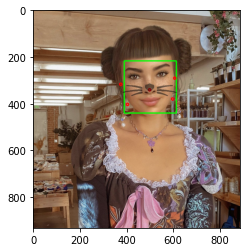

In [10]:
# 1. 이미지에서 스티커가 들어갈 영역만 추출
sticker_area = show_image[sticker_y:sticker_y+sticker_height, sticker_x:sticker_x+sticker_width]
# 2. 스티커 영역에 스티커 합성
add_weighted_sticker = cv2.addWeighted(sticker_area,0.5, resized_sticker, 0.5, 0)

# 3. 이미지 중 스티커가 들어갈 영역의 픽셀들을 2에서 만든 합성 이미지의 픽셀들로 교체
#    스티커의 픽셀이 255인 경우(흰색)에는 기존 이미지의 픽셀로 아닐경우 합성된 이미지의 픽셀로 교체
show_image[sticker_y:sticker_y+sticker_height, sticker_x:sticker_x+sticker_width] \
    = np.where(resized_sticker==255,sticker_area,add_weighted_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB))

## 원본 이미지에 적용

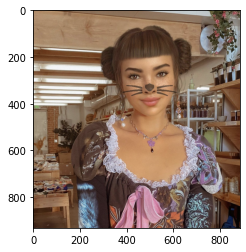

In [11]:
# 1. 원본 이미지에서 스티커가 들어갈 영역만 추출
sticker_area = origin_image[sticker_y:sticker_y+sticker_height, sticker_x:sticker_x+sticker_width]
# 2. 스티커 영역에 스티커 합성
add_weighted_sticker = cv2.addWeighted(sticker_area,0.5, resized_sticker, 0.5, 0)

# 3. 이미지 중 스티커가 들어갈 영역의 픽셀들을 2에서 만든 합성 이미지의 픽셀들로 교체
#    스티커의 픽셀이 255인 경우(흰색)에는 원본 이미지의 픽셀로 아닐경우 합성된 이미지의 픽셀로 교체
origin_image[sticker_y:sticker_y+sticker_height, sticker_x:sticker_x+sticker_width] \
    = np.where(resized_sticker==255,sticker_area,add_weighted_sticker).astype(np.uint8)

final_image = cv2.cvtColor(origin_image, cv2.COLOR_BGR2RGB)
plt.imshow(final_image)


## 스티커붙이기 함수로 정의

sticker_width 233
sticker_height 233
sticker_x 383
sticker_y 224
sticker_area (233, 233, 3)
sticker_img (233, 233, 3)


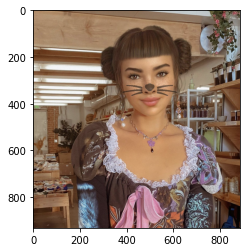

In [12]:
def detect_face(origin_image):
    """
    origin_image에서 얼굴 1개를 찾아 rect 좌표를 리턴한다

    :param origin_image: 이미지
    :return: 1명의 face_rect
    """
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(origin_image, 1)
    face_rect = dlib_rects[0]
    return face_rect

def detect_landmark(origin_image, face_rect):
    """
    origin_image 중 face_rect 영역에 한정해서
    코, 얼굴의 좌상, 좌하, 우상, 우하 point를 리턴한다

    :param origin_image: 이미지
    :param face_rect: 랜드마크를 검출할 얼굴의 영역
    :return: 코, 얼굴의 좌상, 좌하, 우상, 우하 point
    """
    model_path =  "../models/shape_predictor_68_face_landmarks.dat"
    landmark_predictor = dlib.shape_predictor(model_path)

    points = landmark_predictor(origin_image, face_rect)
    parts = points.parts()

    nose_center_point = parts[30]
    face_left_top = parts[1]
    face_left_bottom = parts[4]
    face_right_top = parts[15]
    face_right_bottom = parts[12]

    return nose_center_point, face_left_top, face_left_bottom, face_right_top, face_right_bottom

def load_sticker(width, height):
    """
    고양이 수염 스티커를 불러와 사이즈를 조정해 리턴한다
    :param width: 넓이
    :param height: 높이
    :return: 사이즈가 조정된 이미지
    """
    sticker_path = '../image/whiskers.png'
    origin_sticker_img = cv2.imread(sticker_path)

    # 고양이수염 이미지 원본 비율(1:1)을 유지하기 위해 높이는 넓이값에 고정
    return cv2.resize(origin_sticker_img, (width, height))

def change_pixel_sticker_area(origin_img, sticker_img, sticker_y, sticker_x, sticker_h, sticker_w):
    """
    원본 이미지에서 스티커 영역을 추출해서 스티커 이미지와 합성한다

    :param origin_img: 원본 이미지
    :param sticker_img: 스티커 이미지
    :param sticker_y: 스티커를 붙일 y 좌표
    :param sticker_x: 스티커를 붙일 x 좌표
    :param sticker_h: 스티커의 높이
    :param sticker_w: 스티커의 넓이
    :return: 스티커가 합성된 원본 이미지
    """

    # 1. 원본 이미지에서 스티커가 들어갈 영역만 추출
    sticker_area = origin_img[sticker_y:sticker_y+sticker_h, sticker_x:sticker_x+sticker_w]
    # sticker_area = origin_img[sticker_y:sticker_y+sticker_h, sticker_x:sticker_x+sticker_w]
    print("sticker_area", sticker_area.shape)
    print("sticker_img", sticker_img.shape)

    # 2. 스티커가 원본 이미지 영역을 벗어나면 넘어간 부분은 합성에서 제외
    if sticker_area.shape[0] < sticker_img.shape[0]:
        sticker_img = np.delete(sticker_img, np.s_[sticker_area.shape[0]-sticker_img.shape[0]::], 0)

    if sticker_area.shape[1] < sticker_img.shape[1]:
        sticker_img = np.delete(sticker_img, np.s_[sticker_area.shape[1]-sticker_img.shape[1]::], 1)

    # 3. 스티커 영역에 스티커 합성
    add_weighted_sticker = cv2.addWeighted(sticker_area,0.5, sticker_img, 0.5, 0)

    # 4. 이미지 중 스티커가 들어갈 영역의 픽셀들을 2에서 만든 합성 이미지의 픽셀들로 교체
    #    스티커의 픽셀이 255인 경우(흰색)에는 원본 이미지의 픽셀로 아닐경우 합성된 이미지의 픽셀로 교체
    origin_img[sticker_y:sticker_y+sticker_h, sticker_x:sticker_x+sticker_w] \
        = np.where(sticker_img==255,sticker_area,add_weighted_sticker).astype(np.uint8)
    return origin_img

def stick_whisker(origin_img_path):
    """

    :param origin_img_path: 스티커를 붙일 원본 이미지 경로

    :return 스티커가 붙은 이미지
    """

    # 원본 이미지
    origin_image = cv2.imread(origin_img_path)

    # 얼굴 rect 검출
    face_rect = detect_face(origin_image)

    # 코, 얼굴 랜드마크 검출
    nose_center_point, \
    face_left_top,\
    face_left_bottom,\
    face_right_top,\
    face_right_bottom = detect_landmark(origin_image, face_rect)

    # 스티커 준비
    sticker_width = distance(face_left_top, face_right_top)
    sticker_height = sticker_width
    resized_sticker = load_sticker(sticker_width, sticker_height)

    # 스티커 위치
    sticker_x = nose_center_point.x - sticker_width//2
    sticker_y = nose_center_point.y - sticker_height//2

    print("sticker_width", sticker_width)
    print("sticker_height", sticker_height)
    print("sticker_x", sticker_x)
    print("sticker_y", sticker_y)

    result_image_bgr = change_pixel_sticker_area(origin_img=origin_image,
                                                 sticker_img=resized_sticker,
                                                 sticker_y=sticker_y,
                                                 sticker_h=sticker_height,
                                                 sticker_x=sticker_x,
                                                 sticker_w=sticker_width)
    final_image = cv2.cvtColor(result_image_bgr, cv2.COLOR_BGR2RGB)

    return final_image

image_path = '../image/img3.png'
plt.imshow(stick_whisker(image_path))

## 다른 이미지 테스트


sticker_width 463
sticker_height 463
sticker_x 534
sticker_y 407
sticker_area (463, 463, 3)
sticker_img (463, 463, 3)


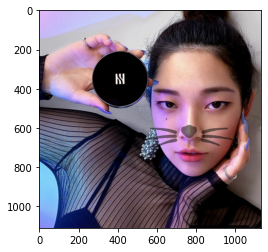

In [13]:
image_path = '../image/img4.png'
plt.imshow(stick_whisker(image_path))

sticker_width 378
sticker_height 378
sticker_x 404
sticker_y 137
sticker_area (378, 378, 3)
sticker_img (378, 378, 3)


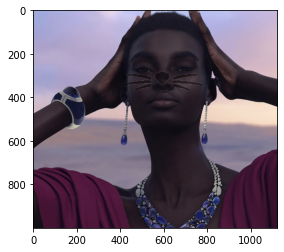

In [14]:
image_path = '../image/img5.png'
plt.imshow(stick_whisker(image_path))

sticker_width 643
sticker_height 643
sticker_x 488
sticker_y 220
sticker_area (643, 643, 3)
sticker_img (643, 643, 3)


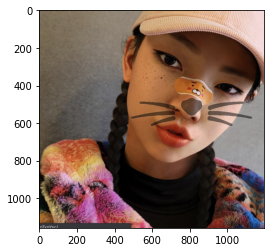

In [15]:
image_path = '../image/img6.png'
plt.imshow(stick_whisker(image_path))

In [16]:
image_path = '../image/img7.png'
plt.imshow(stick_whisker(image_path))

IndexError: 

## 문제점
* 얼굴의 각도가 달라지면 수염이 어색하다
* 얼굴이 가려졌을 경우 얼굴 검출을 제대로 하지 못한다

### Solution 1. 얼굴 각도에 따라 수염을 회전시킨다
* 얼굴의 양쪽 점(landmark_predictor에서 1, 15번째 포인트) 사이의 각도만큼 이미지를 회전시킨다

In [34]:
def face_angle(pt1, pt2):
    dy = pt2.y-pt1.y
    dx = pt2.x-pt1.x

    return math.atan2(dy, dx)*180/math.pi

In [35]:
image_path = '../image/img6.png'
image= cv2.imread(image_path)
face_rect = detect_face(image)

nose_center_point, \
face_left_top,\
face_left_bottom,\
face_right_top,\
face_right_bottom = detect_landmark(image, face_rect)

angle = face_angle(face_left_top, face_right_top)
angle

25.092169421386124

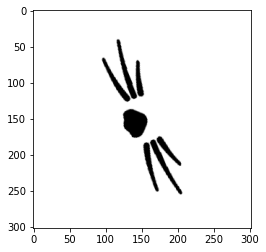

In [27]:
def rotate_image(mat, angle):
    """
    Rotates an image (angle in degrees) and expands image to avoid cropping
    """

    height, width = mat.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0])
    abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]

    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h), borderValue=(255,255,255))
    return rotated_mat

rotated = rotate_image(resized_sticker, -angle)
plt.imshow(rotated)

In [23]:

def stick_auto_rotate_whisker(origin_img_path):
    """

    :param origin_img_path: 스티커를 붙일 원본 이미지 경로

    :return 스티커가 붙은 이미지
    """

    # 원본 이미지
    origin_image = cv2.imread(origin_img_path)

    # 얼굴 rect 검출
    face_rect = detect_face(origin_image)

    # 코, 얼굴 랜드마크 검출
    nose_center_point, \
    face_left_top,\
    face_left_bottom,\
    face_right_top,\
    face_right_bottom = detect_landmark(origin_image, face_rect)


    # 스티커 준비
    sticker_width = distance(face_left_top, face_right_top)
    sticker_height = sticker_width
    resized_sticker = load_sticker(sticker_width, sticker_height)
    print("resized_sticker", resized_sticker.shape)

    angle = face_angle(face_left_top, face_right_top)
    rotated_sticker = rotate_image(resized_sticker, -angle)
    rotated_sticker_width = rotated_sticker.shape[0]
    rotated_sticker_height = rotated_sticker.shape[1]
    print("rotated_sticker", rotated_sticker.shape)

    # 스티커 위치
    sticker_x = nose_center_point.x - rotated_sticker_width//2
    sticker_y = nose_center_point.y - rotated_sticker_height//2

    result_image = change_pixel_sticker_area(origin_img=origin_image,
                                             sticker_img=rotated_sticker,
                                             sticker_x=sticker_x,
                                             sticker_y=sticker_y,
                                             sticker_w=rotated_sticker_width,
                                             sticker_h=rotated_sticker_height)

    final_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

    return final_image

resized_sticker (160, 160, 3)
rotated_sticker (220, 220, 3)
sticker_area (220, 220, 3)
sticker_img (220, 220, 3)


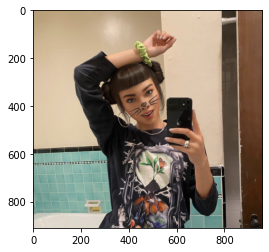

In [24]:

image_path = '../image/img8.png'
plt.imshow(stick_auto_rotate_whisker(image_path))